# Building the Dashboard with Dash

* [Dash Documentation](https://dash.plotly.com/)
    * free and open source Python library created and maintained by the company Plotly
    * helps build dashboards - tools to display data visually and allow users to interact with it
    * built on top of Flask and reactjs
    * does not make any plots (plotly library does)
    * can add plolty graphs to dash application


## Parts of a Dash application

There are two parts of a Dash application:

* Layout
* Interactivity (Callback functions)

### Layout

* Physical components of application
* Two broad types of components
    * HTML elements (same as normal HTML elements)
    * dash components (combine together HTML/CSS and JavaScript into a single component)
        * dropdown menus, checklists, tabs, sliders, placeholders for plotly figures, etc...

### Interactivity (Callback functions)

* Functions that makes changes to layout
* Almost any event within an application can be mapped to a **callback** function
    * Ex: Country clicked in the data table loads three graphs to the right

## Beginning a dash application

* Written in a separate file 
* For this class, written in this notebook

### Minimal dashboard

Minimum of three lines of code to run

* Create the application with `JupyterDash`
* Set the `layout` attribute
* Execute the `run_server` method with `mode` set to `"inline"`

Create an h2 HTML element

[0]: https://www.sublimetext.com/
[1]: https://code.visualstudio.com/

In [28]:
from dash import Dash
from dash import html

app = Dash(__name__)
app.layout = html.H2('Coronavirus Forecasting Dashboard')
app.run_server(mode='inline', height=100, port=8051)

## Can view dashboard in browser

Navigate to `localhost:8051`

## HTML elements in dash

* All normal HTML elements are available as Python classes from the `html` module in Dash
    * `html.H1` ... `html.H6` - headers in decreasing size
    * `html.A` - hyperlink
    * `html.P` - paragraph
    * `html.Div` - logical division
* Use first argument as element's content
* Use other parameters to set HTML attributes
    * Ex: `href` for `html.A` links

In [29]:
title = html.H2('Coronavirus Forecasting Dashboard')
link = html.A('Visit live dashboard', href='https://coronavirus.dunderdata.com')
layout = html.Div([title, link])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=300, port=8052)

### Adding CSS

* In actual project, CSS is kept in an external stylesheet, `style.css`
* No `html.Style` class
* Must use `style` parameter of individual element

In [30]:
title = html.H2('Coronavirus Forecasting Dashboard', 
                style={
                    'background-color': 'tan',
                    'font-family': 'verdana',
                    'text-align': 'center'
                }
               )
link = html.A('Visit live dashboard', href='https://coronavirus.dunderdata.com')
layout = html.Div([title, link])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=100, port=8053)

## Creating a data table

* Separate module, `dash_table`, contains the `DataTable` class to create interactive tables of data
* [Official documentation][0] 

Many parameters

* `data` - List of dictionaries where each list represents one row. 
    * Use `df.to_dict('records')` to convert DataFrames
* `columns` - List of dictionaries where each item represents information (name, id, type, format, etc...) on one column. 
    * `[{'name': name, 'id': name} for name in df.columns]`
* `sort_action` - Allow sorting of columns by setting to string `'native'`
* `active_cell` - Initial active cell - will be highlighted - `{"row": 0, "column": 0}`
* `style_table` - CSS for `table` HTML element (not for individual rows, columns, or cells)
* `style_cell` - CSS for ALL cells
* `style_header` - CSS for only the header (columns)
* `style_data` - CSS for only the data
* `style_data_conditional` - CSS based on if/else condition
    * `{"if": {"column_id": first_col}, "width": "120px", "textAlign": "left"}`
* `fixed_rows` - Keep the first `n` rows fixed when scrolling down. Mainly used to keep the column names on top.
    * `{ 'headers': True, 'data': n }`

[0]: https://dash.plotly.com/datatable

### Display Summary as Dash DataTable

* Read in the summary table as a pandas DataFrame placing the group (either "world" or usa") in the index
* It has one row per area for the "current" date.

In [31]:
import pandas as pd
SUMMARY = pd.read_csv("summary.csv", index_col="group", parse_dates=["date"])
SUMMARY.head(3)

,area,Daily Deaths,Daily Cases,Deaths,Cases,code,population,Deaths per Million,Cases per Million,date
group,,,,,,,,,,
usa,Alabama,0,0,21032,1644533,AL,4.900,4292.0,335620.0,2023-03-09
usa,Alaska,0,0,1486,307655,AK,0.730,2036.0,421450.0,2023-03-09
usa,American Samoa,0,0,34,8320,AS,0.055,618.0,151270.0,2023-03-09


Select a group and subset of the columns

In [32]:
group = "world"
used_columns = ["area", "Deaths", "Cases", "Deaths per Million", "Cases per Million"]
df = SUMMARY.loc[group, used_columns]
df = df.rename(columns={"area": "Country"})
df.head(3)

,Country,Deaths,Cases,Deaths per Million,Cases per Million
group,,,,,
world,Afghanistan,7896,209451,203.0,5380.0
world,Albania,3598,334457,1250.0,116220.0
world,Algeria,6881,271496,157.0,6190.0


### Formatting the columns

* List of dictionaries
* `name` - visible label for column
* `id` - internal identification)
* `type` - "any", "numeric", "text", or "datetime"
* `format` to a dictionary that uses the key `specifier` to set the formatting (based on [D3 format][1])

First column is text, rest are numeric

[1]: https://github.com/d3/d3-format

In [33]:
columns = [{"name": "Country", 
            "id": "Country", 
            "type": "text"}]
for name in df.columns[1:]:
    col_info = {
        "name": name,
        "id": name,
        "type": "numeric",
        "format": {'specifier': ','}
    }
    columns.append(col_info)

Sort by deaths and convert DataFrame to list of dictionaries

In [34]:
data = df.sort_values("Deaths", ascending=False).to_dict("records")
data[:3]

[{'Country': 'USA',
  'Deaths': 1123836,
  'Cases': 103802702,
  'Deaths per Million': 3411.0,
  'Cases per Million': 315060.0},
 {'Country': 'Brazil',
  'Deaths': 699276,
  'Cases': 37081209,
  'Deaths per Million': 3290.0,
  'Cases per Million': 174450.0},
 {'Country': 'India',
  'Deaths': 530779,
  'Cases': 44690738,
  'Deaths per Million': 385.0,
  'Cases per Million': 32380.0}]

### Notes on table

* `active_cell` highlights and makes the first cell active
* Use conditional styling to underline values in the first column and turn the cursor into a pointer (inform user that it is clickable)

### Create the table and add to layout

In [35]:
from dash import dash_table
world_table = dash_table.DataTable(
    id=f"{group}-table",
    columns=columns,
    data=data,
    fixed_rows={"headers": True},
    active_cell={"row": 0, "column": 0},
    sort_action="native",
    derived_virtual_data=data,
    style_table={
        "height": "80vh",  # viewport (% of viewable height)
        "overflow-y": "scroll"
        },
    style_cell={
        "white-space": "normal",
        "height":"auto",
        "font-family": "verdana"
    },
    style_header={
        "text-align": "center",
        "font-size": 14
    },
    style_data={
        "font-size": 12
    },
    style_data_conditional=[
        {
            "if": {"column_id": "Country"},
            "width": "120px",
            "text-align": "left",
            "text-decoration": "underline",
            "cursor": "pointer"
        },
        {
            "if": {"row_index": "odd"}, 
            "background-color": "#fafbfb"
        }
    ],
)
layout = html.Div([title, world_table])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=500, port=8054)

The function below encapsulates all of our work from above and is nearly identical to the one found in `dashboard.py`.

In [36]:
from dash.dash_table import DataTable

def create_table(group):
    used_columns = [
        "area",
        "Deaths",
        "Cases",
        "Deaths per Million",
        "Cases per Million",
    ]
    df = SUMMARY.loc[group, used_columns]
    first_col = "Country" if group == "world" else "State"
    df = df.rename(columns={"area": first_col})

    columns = [{"name": first_col, "id": first_col}]
    for name in df.columns[1:]:
        col_info = {
            "name": name,
            "id": name,
            "type": "numeric",
            "format": {'specifier': ','},
        }
        columns.append(col_info)

    data = df.sort_values("Deaths", ascending=False).to_dict("records")
    return DataTable(
        id=f"{group}-table",
        columns=columns,
        data=data,
        active_cell={"row": 0, "column": 0},
        fixed_rows={"headers": True},
        sort_action="native",
        derived_virtual_data=data,
        style_table={
            "height": "80vh",
            "overflow-y": "scroll",
            "border-radius": "0px 0px 10px 10px",
        },
        style_cell={
            "white-space": "normal",
            "height": "auto",
            "font-family": "verdana",
        },
        style_header={
            "textAlign": "center",
            "fontSize": 14,
        },
        style_data={
            "fontSize": 12,
        },
        style_data_conditional=[
            {
                "if": {"column_id": first_col},
                "width": "120px",
                "text-align": "left",
                "text-decoration": "underline",
                "cursor": "pointer",
            },
            {
                "if": {"row_index": "odd"}, 
                "background-color": "#fafbfb"
            }
        ],
    )

### Create both world and USA tables

In [37]:
world_table = create_table("world")
usa_table = create_table("usa")

## Dash core components

* Separate `dcc` module
* More complex interactive components


###  Creating tabs

* `dcc.Tab` - individual tab. Contains actual content (like our DataTable)
* `dcc.Tabs` - list of `dcc.Tab`

### Function to create individual tabs

* Separate CSS class name when selected

[1]: https://dash.plotly.com/dash-core-components

In [38]:
from dash import dcc

def create_tab(content, label, value):
    return dcc.Tab(
        content,
        label=label,
        value=value,
        id=f"{value}-tab",
        className="single-tab",
        selected_className="single-tab--selected",
    )

world_tab = create_tab(world_table, "World", "world")
usa_tab = create_tab(usa_table, "US States", "usa")

### Place both tabs in one container

We pass the individual tabs as a list to the `Tabs` component and update our layout to show the tabs with the tables.

In [39]:
table_tabs = dcc.Tabs(
    [world_tab, usa_tab], 
    className="tabs-container", 
    id="table-tabs",
    value="world"
)
layout = html.Div([title, table_tabs])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=500, port=8055)

## Adding plotly figures with `dcc.Graph`

* Create a plotly figure
* Pass it to `dcc.Graph`

In [40]:
ALL_DATA = pd.read_csv("all_data.csv", 
                       index_col=["group", "area", "date"], 
                       parse_dates=["date"]).sort_index()
ALL_DATA.head()

Daily Deaths  Daily Cases  Deaths  Cases
group area    date                                                
usa   Alabama 2020-01-22             0            0       0      0
              2020-01-23             0            0       0      0
              2020-01-24             0            0       0      0
              2020-01-25             0            0       0      0
              2020-01-26             0            0       0      0

### Functions to create three graphs

* `create_figures` - creates three empty plotly figures with two plots each
* `make_cumulative_graphs` - cumulative line graphs of total deaths/cases
* `make_daily_graphs` - daily bar chart of deaths/cases
* `make_weekly_graphs` - aggregated weekly totals of deaths/cases
* `create_graphs` - runs the above four functions and returns three completed figures.

In [41]:
from plotly.subplots import make_subplots
from plotly.colors import qualitative
COLORS = qualitative.T10[:2]
LAST_DATE = SUMMARY['date'].iloc[-1]
FIRST_PRED_DATE = LAST_DATE + pd.Timedelta('1D')

def create_figures(title, n=3):
    figs = []
    annot_props = {"x": 0.1, "xref": "paper", "yref": "paper", "xanchor": "left",
                   "showarrow": False, "font": {"size": 18}}
    for _ in range(n):
        fig = make_subplots(rows=2, cols=1, vertical_spacing=0.1)
        fig.update_layout(
            title={"text": title, "x": 0.5, "y": 0.97, "font": {"size": 20}},
            annotations=[
                {"y": 0.95, "text": "<b>Deaths</b>"},
                {"y": 0.3, "text": "<b>Cases</b>"},
            ],
            margin={"t": 40, "l": 50, "r": 10, "b": 0},
            legend={"x": 0.5, "y": -0.05, "xanchor": "center", "orientation": "h",
                    "font": {"size": 15}})
        fig.update_traces(hovertemplate="%{x} - %{y:,}")
        fig.update_annotations(annot_props)
        figs.append(fig)
    return figs

def make_cumulative_graphs(fig, df_dict, kinds):
    for row, kind in enumerate(kinds, start=1):
        for i, (name, df) in enumerate(df_dict.items()):
            fig.add_scatter(x=df.index, y=df[kind], mode="lines+markers", 
                            showlegend=row==1, line={"color": COLORS[i]}, 
                            name=name, row=row, col=1)

def make_daily_graphs(fig, df_dict, kinds):
    for row, kind in enumerate(kinds, start=1):
        for i, (name, df) in enumerate(df_dict.items()):
            fig.add_bar(x=df.index, y=df[kind], marker={"color": COLORS[i]},
                        showlegend=row==1, name=name, row=row, col=1)

def make_weekly_graphs(fig, df_dict, kinds):
    offset = "W-" + LAST_DATE.strftime("%a").upper()
    df_dict = {name: df.resample(offset, kind="timestamp", closed="right")[kinds].sum()
               for name, df in df_dict.items()}

    for row, kind in enumerate(kinds, start=1):
        for i, (name, df) in enumerate(df_dict.items()):
            fig.add_scatter(x=df.index, y=df[kind], mode="lines+markers",
                            showlegend=row==1, line={"color": COLORS[i]},
                            name=name, row=row, col=1)
            
def create_graphs(group, area):
    df = ALL_DATA.loc[(group, area)]
    df_dict = {"actual": df.loc[:LAST_DATE], "prediction": df.loc[FIRST_PRED_DATE:]}
    kinds = ["Deaths", "Cases"]
    new_kinds = ["Daily Deaths", "Daily Cases"]
    figs = create_figures(area)
    make_cumulative_graphs(figs[0], df_dict, kinds)
    make_daily_graphs(figs[1], df_dict, new_kinds)
    make_weekly_graphs(figs[2], df_dict, new_kinds)
    return figs

Let's choose one area to make the three graphs.

In [42]:
figs = create_graphs('usa', 'Texas')

Here are the cumulative line graphs for cases in deaths as a plotly figure. This is independent of dash at this point.

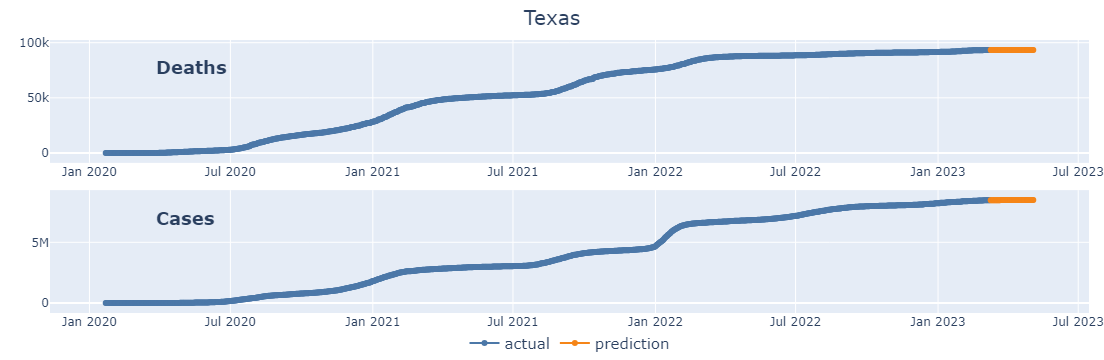

In [43]:
figs[0]

Daily bar graph:

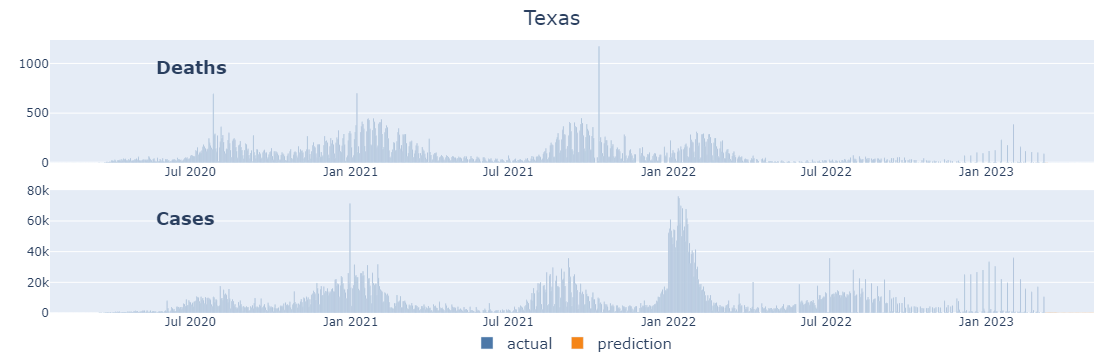

In [44]:
figs[1]

Weekly aggregate line graph:

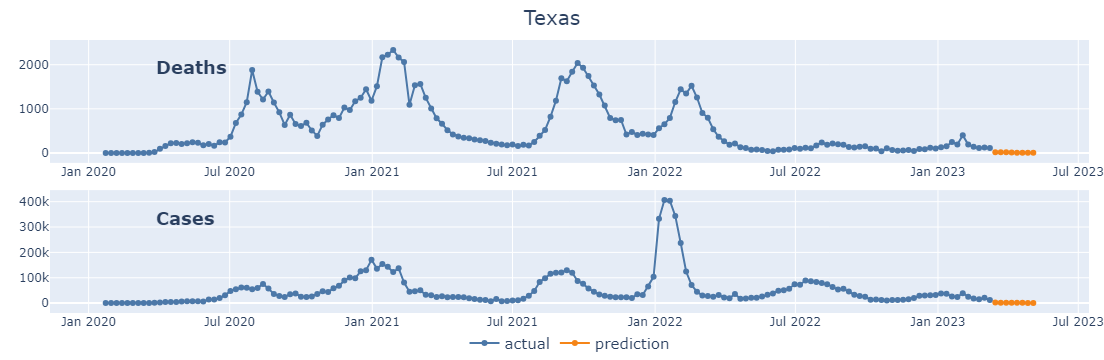

In [45]:
figs[2]

### Use CSS grid layout

* Set `figure` parameter of `dcc.Graph` to be one of the plotly figures 
* Create `div` containing tables and graphs
    * By default, these are block-level elements (placed vertically)
    * Set `display` to `grid` to display tables and graph in a grid
    * [More info on CSS grid](https://css-tricks.com/snippets/css/complete-guide-grid/)
* Create a 2 x 2 grid with `grid-template-areas`

```css
"tables graphs"
"tables maps"
```

In [46]:
cumulative_graph = dcc.Graph(figure=figs[0], style={'grid-area': "graphs"})
table_tabs.style = {'grid-area': "tables"}
container = html.Div([table_tabs, cumulative_graph], 
                     style={'display': 'grid',
                            'grid-template-areas': '"tables graphs" '
                                                   '"tables maps"',
                            'grid-template-columns': "50vw 50vw",
                            'column-gap': '10px'})
layout = html.Div([title, container])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=600, port=8056)

### Use tabs to contain all three graphs

In [47]:
cumulative_graph = dcc.Graph(figure=figs[0], id="cumulative-graph")
daily_graph = dcc.Graph(figure=figs[1], id="daily-graph")
weekly_graph = dcc.Graph(figure=figs[2], id="weekly-graph")

cumulative_tab = create_tab(cumulative_graph, "Cumulative", "cumulative")
daily_tab = create_tab(daily_graph, "Daily", "daily")
weekly_tab = create_tab(weekly_graph, "Weekly", "weekly")

graph_tabs = dcc.Tabs(
    [cumulative_tab, daily_tab, weekly_tab],
    className="tabs-container",
    id="graph-tabs",
    value="cumulative",
    style={'gridArea': 'graphs', 'margin': '0px'}
)

container = html.Div([table_tabs, graph_tabs], 
                     style={'display': 'grid',
                            'grid-template-areas': '"tables graphs" '
                                                   '"tables maps"',
                            'grid-template-columns': "50vw 50vw",
                            'column-gap': '10px'})
layout = html.Div([title, container])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=600, port=8057)

## Adding the maps

The last main component of the dashboard are the world and USA maps. Here, we copy the code from a previous chapter that creates the maps with custom hover text.

In [48]:
import plotly.graph_objects as go

def hover_text(x):
    name = x["area"]
    deaths = x["Deaths"]
    cases = x["Cases"]
    deathsm = x["Deaths per Million"]
    casesm = x["Cases per Million"]
    return (
        f"<b>{name}</b><br>"
        f"Deaths - {deaths:,.0f}<br>"
        f"Cases - {cases:,.0f}<br>"
        f"Deaths per Million - {deathsm:,.0f}<br>"
        f"Cases per Million - {casesm:,.0f}<br>"
    )

def create_map(group, radio_value):
    df = SUMMARY.loc[group].query("population > 0.5")
    lm = None if group == "world" else "USA-states"
    proj = "robinson" if group == "world" else "albers usa"

    fig = go.Figure()
    fig.add_choropleth(
        locations=df["code"],
        z=df[radio_value],
        zmin=0,
        locationmode=lm,
        colorscale="orrd",
        marker_line_width=0.5,
        text=df.apply(hover_text, axis=1),
        hoverinfo="text",
        colorbar=dict(len=0.6, x=1, y=0.5),
    )
    fig.update_layout(
        geo={
            "lataxis": {"range": [-50, 68]},
            "lonaxis": {"range": [-130, 150]},
            "projection": {"type": proj},
            "showframe": False,
        },
        margin={"t": 0, "l": 10, "r": 10, "b": 0},
    )
    return fig

Now we create a single map and color it by deaths per million.

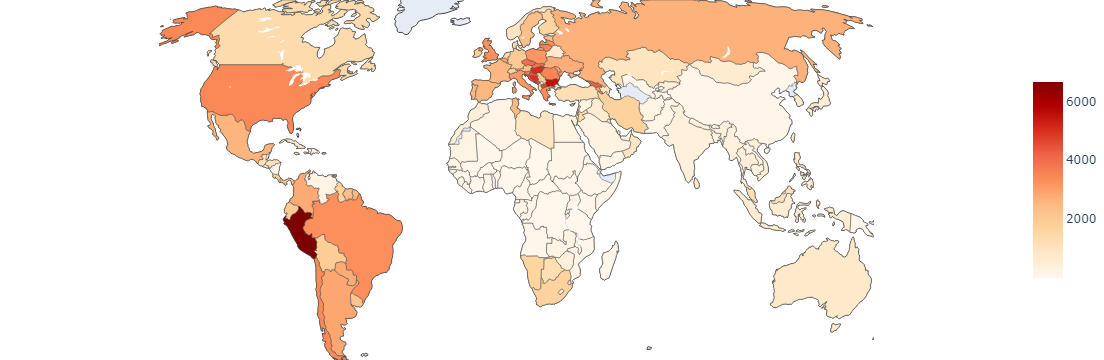

In [49]:
fig_map = create_map('world', 'Deaths per Million')
fig_map

## Adding radio buttons above the map

* Dashboard allows the user to choose the coloring of the map with four radio buttons
* Dash core components (`dcc`) has radio buttons, but does not provide a way to change the style whenever the radio button is checked

### Dash Bootstrap Components

* The third-party library [Dash Bootstrap Components][1] has many components for dash that are built using [Bootstrap][2] (popular CSS and JavaScript library)
* Provides `labelCheckedStyle` so that a separate style can be applied to selected radio button

[1]: https://dash-bootstrap-components.opensource.faculty.ai/
[2]: https://getbootstrap.com/

In [50]:
import dash_bootstrap_components as dbc

radio_items = dbc.RadioItems(
    options=[
        {"label": "Deaths", "value": "Deaths"},
        {"label": "Cases", "value": "Cases"},
        {"label": "Deaths per Million", "value": "Deaths per Million"},
        {"label": "Cases per Million", "value": "Cases per Million"},
    ],
    value="Deaths",
    id="map-radio-items",
    style={'display': 'flex', 
           'justify-content': 'space-evenly', 
           'background-color': '#212529', 
           'color': '#798d8f'},
    labelCheckedStyle={'font-weight': 800, 'color': 'white'}
)

app = Dash(__name__)
app.layout = radio_items
app.run_server(mode='inline', height=50, port=8058)

### Add radio buttons to layout

In [51]:
cumulative_graph.style = {'height': '40vh'}
daily_graph.style = {'height': '40vh'}
weekly_graph.style = {'height': '40vh'}

map_graph = dcc.Graph(figure=fig_map, id="map-graph", style={'height': '40vh'})
map_div = html.Div([radio_items, map_graph], style={'gridArea': 'maps'})
container = html.Div([table_tabs, graph_tabs, map_div], 
                     style={'display': 'grid',
                            'grid-template-areas': '"tables graphs" '
                                                   '"tables maps"',
                            'grid-template-columns': "50vw 50vw",
                            'grid-template-rows': "50vh 40vh",
                            'column-gap': '10px',
                            })
layout = html.Div([title, container])

app = Dash(__name__)
app.layout = layout
app.run_server(mode='inline', height=800, port=8059)

## Interactivity using callbacks

* The **layout** is complete
* Moving on to he **interactivity**
* Code for the interactivity MUST appear after `app.layout` has been set
* Interactivity is user-defined functions that get triggered from a dashboard event (button click)

### Writing a callback

* `app.callback` method decorates the function and takes three main arguments:
    * Outputs - A list of layout components to be changed
    * Inputs - A list of layout components that trigger the function
    * States - A list of non-triggered layout components to pass to the function
* Function defined with one parameter for every input
* Function must return the number of outputs

### `Output`, `Input`, and `State`

* `Output`, `Input`, and `State`
    * Describe the arguments to your callback function, and the return values
    * Found in `dash.dependencies` module
    * Require two arguments
        * **id** of the component
        * targeted **property**
        
Examples:

* `Output("cumulative-graph", "figure")`
    * Component with id of "cumulative-graph" should have its "figure" property replaced with a returned value
* `Input('world-table', 'active_cell')`
    * Trigger the function whenever the `active_cell` property of the component with id "world-table" is changed
* `State('world-table', 'derived_virtual_data')`
    * Tells dash to pass the value of the property `derived_virtual_data` of the component with id `"world-table"` to the function.
    `State` does not trigger the function. Just passes extra data to function
* Callback function name and parameter names can be anything


### `data` vs `derived_virtual_data`

Both are properties of a DataTable

* `data` is static
* `derived_virtual_data` is **dynamic** and matches data that user sees

### All callbacks called when dashboard starts

* Savs you from repeating code
* Don't have to set the components that will change during callback

### Callback for the graphs in top right

The three graphs in the top right of our dashboard change whenever the use clicks an area in the table

* Need to return three plotly figures
* Input is the active cell of the table (when changed)
    * Only provided the row and column as a dictionary
    * First argument to function
* Also passed the `derived_virtual_data` (list of dictionaries)
    * Second argument to function

In [52]:
from dash.dependencies import Output, Input, State

app = Dash(__name__)
app.layout = layout

@app.callback(
    [
        Output("cumulative-graph", "figure"),
        Output("daily-graph", "figure"),
        Output("weekly-graph", "figure"),
    ],
    [
        Input('world-table', 'active_cell')
    ],
    [
        State('world-table', 'derived_virtual_data')
    ]
)
def change_area_graphs(world_cell, world_data):
    """
    Change the all three graphs in the upper right hand corner of the app
    
    Parameters
    ----------
    world_cell : dict with keys `row` and `cell` mapped to integers of cell location
    
    world_data : list of dicts of one country per row.
                     Has keys Country, Deaths, Cases, Deaths per Million, Cases per Million
                     
    Returns
    -------
    List of three plotly figures, one for each of the `Output`
    """
    row_number = world_cell["row"]
    row_data = world_data[row_number]
    country = row_data['Country']
    print("active_cell", world_cell, 
          "\nrow_number", row_number, 
          "\nrow_data", row_data, 
          "\ncountry", country)
    return create_graphs('world', country)
    
app.run_server(mode='inline', height=800, port=8060)

### Single Callback for updating both World and USA data

* A component may only appear as an output in exactly **one** callback
* Cannot have separate callbacks for the world and USA tables (they update same graphs)
* Must rewrite callback
    * Triggered when:
        * World table changes
        * USA table changes
        * Table tab switches
* Logic to prevent update
    * Only allow first column to trigger
    * Sometimes active cell is `None` (after sorting)
    * Must raise `PreventUpdate` exception

In [53]:
from dash.exceptions import PreventUpdate

app = Dash(__name__)
app.layout = layout

@app.callback(
    [
        Output("cumulative-graph", "figure"),
        Output("daily-graph", "figure"),
        Output("weekly-graph", "figure"),
    ],
    [
        Input("world-table", "active_cell"),
        Input("usa-table", "active_cell"),
        Input("table-tabs", "value"),
    ],
    [
        State("world-table", "derived_virtual_data"),
        State("usa-table", "derived_virtual_data"),
    ],
)
def change_area_graphs(world_cell, usa_cell, group, world_data, usa_data):
    area, cell, data = "Country", world_cell, world_data
    if group == "usa":
        area, cell, data = "State", usa_cell, usa_data
    if cell and cell["column"] == 0:
        country_state = data[cell["row"]][area]
        return create_graphs(group, country_state)
    else:
        raise PreventUpdate
        
app.run_server(mode='inline', height=800, port=8061)

## Callback to change the map

* Need one more callback to change the map and/or its coloring
* This function gets triggered when:
    * The table tabs change
    * The radio items is clicked
* Return a single figure using our `create_map` function defined above

In [54]:
app = Dash(__name__)
app.layout = layout

@app.callback(
    [
        Output("cumulative-graph", "figure"),
        Output("daily-graph", "figure"),
        Output("weekly-graph", "figure"),
    ],
    [
        Input("world-table", "active_cell"),
        Input("usa-table", "active_cell"),
        Input("table-tabs", "value"),
    ],
    [
        State("world-table", "derived_virtual_data"),
        State("usa-table", "derived_virtual_data"),
    ],
)
def change_area_graphs(world_cell, usa_cell, group, world_data, usa_data):
    area, cell, data = "Country", world_cell, world_data
    if group == "usa":
        area, cell, data = "State", usa_cell, usa_data
    if cell and cell["column"] == 0:
        country_state = data[cell["row"]][area]
        return create_graphs(group, country_state)
    else:
        raise PreventUpdate

@app.callback(
    Output("map-graph", "figure"),
    [
        Input("table-tabs", "value"), 
        Input("map-radio-items", "value")
    ],
)
def change_map(group, radio_value):
    return create_map(group, radio_value)

app.run_server(mode='inline', height=800, port=8062)

### Differences between this tutorial and `dashboard.py`

Open the `dashboard.py` file and review the code. It is largely the same as it was presented in this tutorial, however, there are a few differences:

* The dash application is instantiated with `Dash` from the library `dash` and not `JupyterDash`
* All of the CSS (except for the data tables) has moved to assets/style.css
* The CSS for Bootstrap (and any other external CSS) must be linked using the `external_stylesheets` parameter when instantiating `Dash`. It is set to a list of URLs containing CSS.
* A new column in our CSS grid is added on the left. Four bootstrap "cards" from `dash_bootstrap_components` are placed in this column.
* A navigation bar is added to the top of the page using `dash_bootstrap_components`
* CSS is added to target screens with a width less than 1000px using a media query.
    * Take a look at the bottom of assets/style.css. You'll see the following selector 
        * `@media only screen and (max-width: 1000px)`

## Dash Summary

* Dash vs Plotly 
    * Dash builds the dashboard application with HTML components and provides interactivity with callbacks
    * Dash does not do visualization
    * Plotly creates all visualizations
    * Plotly visualizations must be placed in a `dcc.Graph` component
* Two parts of a dash application
    * **Layout**
        * Dash HTML Components - nearly all regular HTML components
        * Dash Core Components - interactive widgets
        * Dash Data Tables - two dimensional tables
        * Dash Bootstrap Components - third-party library with more widgets styled with Bootstrap
        * Must set `app.layout` to a dash component to finalize layout
    * **Interactivity**
        * Functions triggered by user events
        * Functions receive component values as inputs
        * Functions return new component values as outputs
        * Interactivity must come after `app.layout` is set
* Dash HTML Components
    * Separate module - `html`
    * Uses same tag names as regular HTML, but capitalized
    * First parameter is content
    * Provide id and class as `id` and `className` parameters
    * Can provide CSS with `style` parameter, but better to do so in `assets/style.css`
* Dash Core Components
    * Separate module - `dcc`
    * Many widgets that bundle together HTML/CSS and JavaScript
    * Dropdown menus, radio buttons, tabs, and more
    * Use `dcc.Graph` to add plotly figure
* Dash Data Tables
    * Separate module - `DashTable` with `dash_table` component
    * Provide data as a list of dictionaries. Use `df.to_dict('records')`
    * Set style for whole table, each cell, just the headers, or just the data with `style_*` parameters
* Dash Bootstrap Components
    * Third-party library - `dash_bootstrap_components` - aliased as dbc
    * Must set `external_stylesheets` in `Dash` constructor to a list of URLs of the specific flavor of Bootstrap you want.
    * Many extra components not provided by `dash_core_components`
* Callback functions
    * Must be defined after `app.layout` is set
    * Function and parameter names are arbitrary
    * Decorate functions with `app.callback`
    * Pass `app.callback` a list of the outputs, inputs, and states
    * Use `Input`, `Output`, and `State` from `dash.dependencies` to target the component and its property
        * Example: `Input("component-id", "component-property")`
    * Function must return a value for each of the outputs
    * Raise the `dash.exceptions.PreventUpdate` exception if you don't want the function to update any component
    * Every callback is called when the app first launches
    * Each component may appear as an output in exactly one callback
        * May need to combine many triggers into one function to work around this limitation
    * Each component may appear as an input in ANY number of callbacks